In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('data/iris.csv')

In [4]:
en = LabelEncoder()

In [5]:
df['Species'] = en.fit_transform(df['Species'])

In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


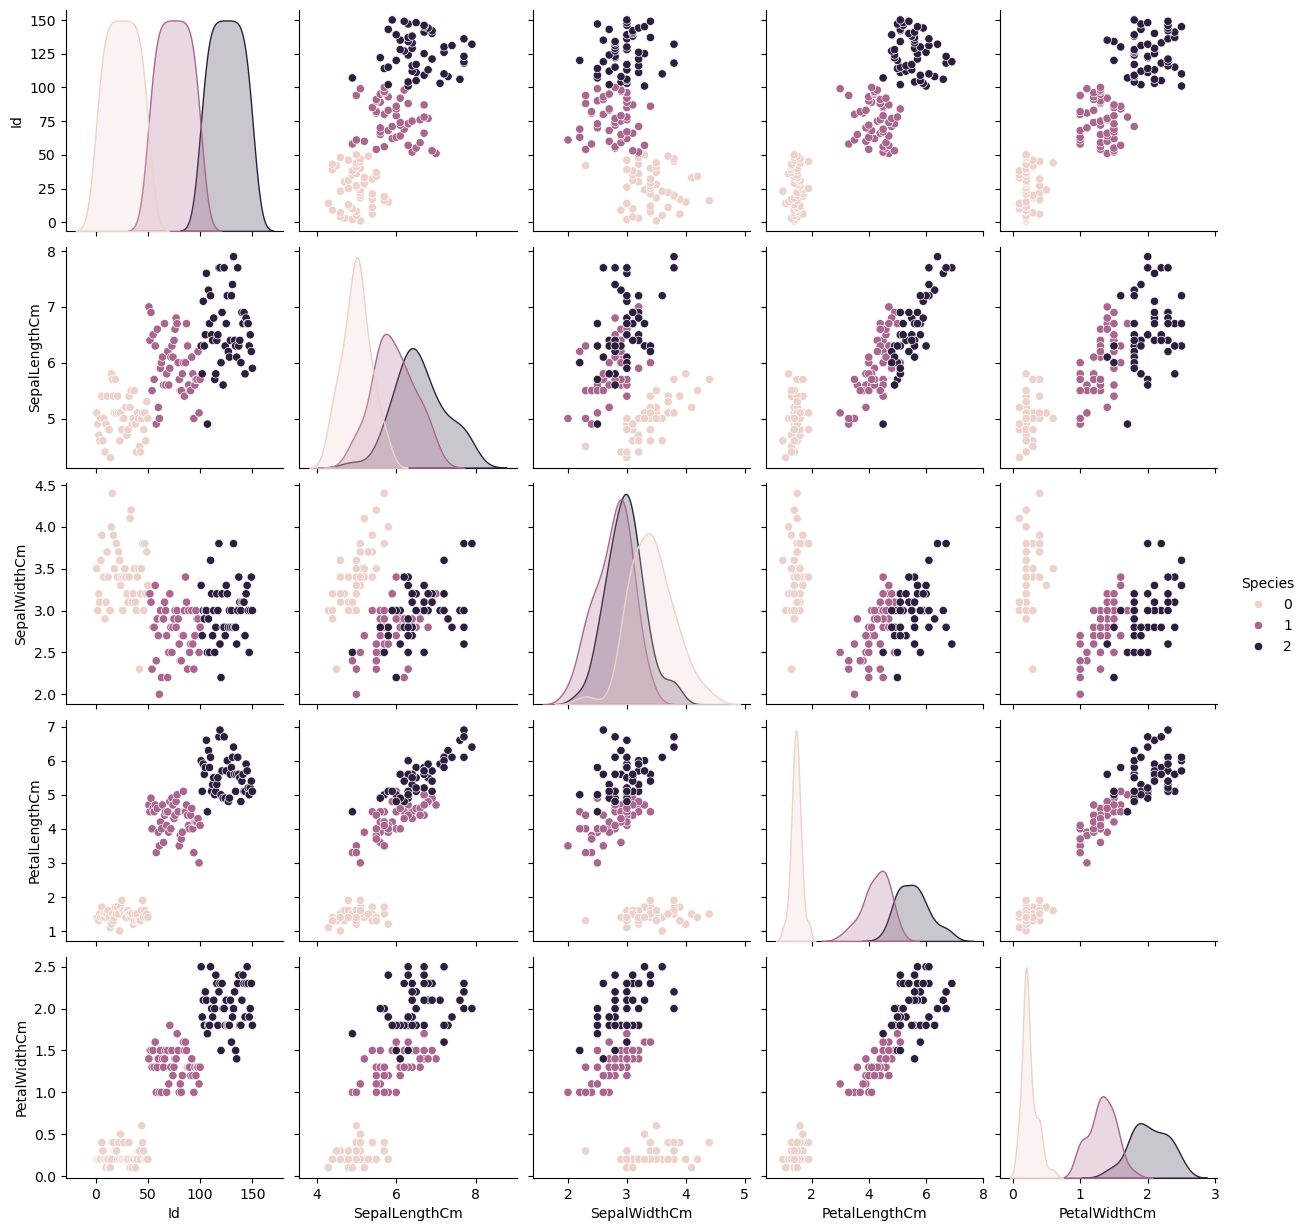

In [7]:
# let's plot a pair plot to see realation
sns.pairplot(df,hue='Species')

In [8]:
X = df[['SepalWidthCm','SepalLengthCm']]
y = df['Species']

In [9]:
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier()
clf3 = RandomForestClassifier()

In [10]:
estimators = [('lr',clf1),('knn',clf2),('rf',clf3)]

In [11]:
for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv = 10,scoring = 'accuracy')
    print(f'{estimator[0]} have accuracy {np.mean(x)}')

lr have accuracy 0.8066666666666669
knn have accuracy 0.76
rf have accuracy 0.7133333333333334


In [12]:
vc = VotingClassifier(estimators=estimators,voting='hard')
x = cross_val_score(vc,X,y,cv = 10 , scoring = 'accuracy')
print(f'vc have accuracy with hard voting {np.mean(x)}')

vc have accuracy with hard voting 0.7733333333333333


In [13]:
vc = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc,X,y,cv = 10 , scoring = 'accuracy')
print(f'vc have accuracy with soft voting {np.mean(x)}')

vc have accuracy with soft voting 0.7666666666666667


# weighted Classifer

In [14]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc = VotingClassifier(estimators=estimators,voting='soft',weights=[i,j,k])
            x = cross_val_score(vc,X,y,cv = 10 , scoring = 'accuracy')
            print(f'for i = {i} , j = {j} ,k = {k} Accuracy is {np.mean(x)}')

for i = 1 , j = 1 ,k = 1 Accuracy is 0.7666666666666667
for i = 1 , j = 1 ,k = 2 Accuracy is 0.7666666666666666
for i = 1 , j = 1 ,k = 3 Accuracy is 0.7533333333333333
for i = 1 , j = 2 ,k = 1 Accuracy is 0.7533333333333333
for i = 1 , j = 2 ,k = 2 Accuracy is 0.76
for i = 1 , j = 2 ,k = 3 Accuracy is 0.76
for i = 1 , j = 3 ,k = 1 Accuracy is 0.7533333333333333
for i = 1 , j = 3 ,k = 2 Accuracy is 0.7666666666666667
for i = 1 , j = 3 ,k = 3 Accuracy is 0.7533333333333333
for i = 2 , j = 1 ,k = 1 Accuracy is 0.7733333333333333
for i = 2 , j = 1 ,k = 2 Accuracy is 0.7666666666666666
for i = 2 , j = 1 ,k = 3 Accuracy is 0.7533333333333333
for i = 2 , j = 2 ,k = 1 Accuracy is 0.7666666666666667
for i = 2 , j = 2 ,k = 2 Accuracy is 0.76
for i = 2 , j = 2 ,k = 3 Accuracy is 0.7466666666666667
for i = 2 , j = 3 ,k = 1 Accuracy is 0.7666666666666667
for i = 2 , j = 3 ,k = 2 Accuracy is 0.7666666666666667
for i = 2 , j = 3 ,k = 3 Accuracy is 0.7533333333333333
for i = 3 , j = 1 ,k = 1 Accuracy 

# We can see the vc has not good accuracy even we use different models,Sometimes vc does not give good accuracy for different base models 

In [15]:
# now we use same base model with slight changes , let's see output

In [19]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)

svm1 = SVC(probability=True, kernel='poly',degree=1)
svm2 = SVC(probability=True, kernel='poly',degree=2)
svm3 = SVC(probability=True, kernel='poly',degree=3)
svm4 = SVC(probability=True, kernel='poly',degree=4)
svm5 = SVC(probability=True, kernel='poly',degree=5)

In [20]:
estimators = [('svm1',svm1),('svm2',svm2),('svm3',svm3),('svm4',svm4),('svm5',svm5)]

In [21]:
for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv = 10 , scoring = 'accuracy')
    print(f'{estimator[0]} have accuracy {np.mean(x)}')

svm1 have accuracy 0.8540000000000001
svm2 have accuracy 0.8530000000000001
svm3 have accuracy 0.8939999999999999
svm4 have accuracy 0.8089999999999999
svm5 have accuracy 0.8639999999999999


In [22]:
# Now apply a VC

In [23]:
vc = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc,X,y,cv = 10 , scoring = 'accuracy')
print(f'vc have accuracy {np.mean(x)}')

vc have accuracy 0.9260000000000002


# we can see vc gives better result for same base model 